In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
churn=pd.read_csv("D:\machine learning dataset\Customer Churn.csv")

In [3]:
churn

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95        1889.5   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 21 columns]

# EDA

In [4]:
pd.set_option('display.max_columns',None)
churn

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  \
0              No  No phone service             DSL             No   
1             Yes                No             DSL            Yes   
2             Yes                No             DSL            Yes   
3              No  No phone service             DSL            Yes   
4             Yes                No     Fiber optic             No   
...           ...               ...             ...            ...   
7038          Yes               Yes             DSL            Yes   
7039          Yes               Yes     Fiber optic             No   
7040           No  No phone service             DSL            Yes   
7041          Yes               Yes     Fiber optic             No   
7042          Yes                No     Fiber optic            Yes   

     OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  \
0             Yes               No          No          No              No   
1              No              Yes          No          No              No   
2             Yes               No          No          No              No   
3              No              Yes         Yes          No              No   
4              No               No          No          No              No   
...           ...              ...         ...         ...             ...   
7038           No              Yes         Yes         Yes             Yes   
7039          Yes              Yes          No         Yes             Yes   
7040           No               No          No          No              No   
7041           No               No          No          No              No   
7042           No              Yes         Yes         Yes             Yes   

            Contract PaperlessBilling              PaymentMethod  \
0     Month-to-month              Yes           Electronic check   
1           One year               No               Mailed check   
2     Month-to-month              Yes               Mailed check   
3           One year               No  Bank transfer (automatic)   
4     Month-to-month              Yes           Electronic check   
...              ...              ...                        ...   
7038        One year              Yes               Mailed check   
7039        One year              Yes    Credit card (automatic)   
7040  Month-to-month              Yes           Electronic check   
7041  Month-to-month              Yes               Mailed check   
7042        Two year              Yes  Bank transfer (automatic)   

      MonthlyCharges TotalCharges Churn  
0              29.85        29.85    No  
1              56.95       1889.5    No  
2              53.85       108.15   Yes  
3              42.30      1840.75    No  
4              70.70       151.65   Yes  
...              ...          ...   ...  
7038           84.80       1990.5    No  
7039          103.20       7362.9    No  
7040           29.60       346.45    No  
7041           74.40        306.6   Yes  
7042          105.65       6844.5    No  

[7043 rows x 21 columns]

In [5]:
churn.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [6]:
churn.tail()

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  \
7038          Yes               Yes             DSL            Yes   
7039          Yes               Yes     Fiber optic             No   
7040           No  No phone service             DSL            Yes   
7041          Yes               Yes     Fiber optic             No   
7042          Yes                No     Fiber optic            Yes   

     OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  \
7038           No              Yes         Yes         Yes             Yes   
7039          Yes              Yes          No         Yes             Yes   
7040           No               No          No          No              No   
7041           No               No          No          No              No   
7042           No              Yes         Yes         Yes             Yes   

            Contract PaperlessBilling              PaymentMethod  \
7038        One year              Yes               Mailed check   
7039        One year              Yes    Credit card (automatic)   
7040  Month-to-month              Yes           Electronic check   
7041  Month-to-month              Yes               Mailed check   
7042        Two year              Yes  Bank transfer (automatic)   

      MonthlyCharges TotalCharges Churn  
7038           84.80       1990.5    No  
7039          103.20       7362.9    No  
7040           29.60       346.45    No  
7041           74.40        306.6   Yes  
7042          105.65       6844.5    No

In [7]:
churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

converting the total charges column to numeric because as u can see the original dtype is object but data is numeric

In [9]:
churn["TotalCharges"]=pd.to_numeric(churn["TotalCharges"],errors="coerce")

In [10]:
churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [11]:
churn.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

 As we can see above output total cahrges is having 11 null values, as we dont have a appropriate total charges we  will be dropping the 11 null value rows in the same data table

In [12]:
churn.dropna(inplace=True)

In [13]:
churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Q1

In [16]:
customer_5=churn.iloc[:,5]
customer_5

0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7032, dtype: int64

In [18]:
customer_15=churn.iloc[:,15]
customer_15

0       Month-to-month
1             One year
2       Month-to-month
3             One year
4       Month-to-month
             ...      
7038          One year
7039          One year
7040    Month-to-month
7041    Month-to-month
7042          Two year
Name: Contract, Length: 7032, dtype: object

In [22]:
senior_male_electronic=churn[(churn["gender"]=="Male")&(churn["SeniorCitizen"]==1)&(churn["PaymentMethod"]=="Electronic check")]
senior_male_electronic

customerID gender  SeniorCitizen Partner Dependents  tenure  \
20    8779-QRDMV   Male              1      No         No       1   
55    1658-BYGOY   Male              1      No         No      18   
57    5067-XJQFU   Male              1     Yes        Yes      66   
78    0191-ZHSKZ   Male              1      No         No      30   
91    2424-WVHPL   Male              1      No         No       1   
...          ...    ...            ...     ...        ...     ...   
6837  6229-LSCKB   Male              1      No         No       6   
6894  1400-MMYXY   Male              1     Yes         No       3   
6914  7142-HVGBG   Male              1     Yes         No      43   
6967  8739-WWKDU   Male              1      No         No      25   
7032  6894-LFHLY   Male              1      No         No       1   

     PhoneService     MultipleLines InternetService OnlineSecurity  \
20             No  No phone service             DSL             No   
55            Yes               Yes     Fiber optic             No   
57            Yes               Yes     Fiber optic             No   
78            Yes                No             DSL            Yes   
91            Yes                No     Fiber optic             No   
...           ...               ...             ...            ...   
6837          Yes                No     Fiber optic             No   
6894          Yes               Yes     Fiber optic             No   
6914          Yes               Yes     Fiber optic             No   
6967          Yes               Yes     Fiber optic             No   
7032          Yes               Yes     Fiber optic             No   

     OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  \
20             No              Yes          No          No             Yes   
55             No               No          No         Yes             Yes   
57            Yes              Yes         Yes         Yes             Yes   
78            Yes               No          No         Yes             Yes   
91             No               No         Yes          No              No   
...           ...              ...         ...         ...             ...   
6837           No               No          No         Yes              No   
6894          Yes              Yes          No         Yes             Yes   
6914          Yes              Yes          No         Yes             Yes   
6967          Yes               No          No         Yes              No   
7032           No               No          No          No              No   

            Contract PaperlessBilling     PaymentMethod  MonthlyCharges  \
20    Month-to-month              Yes  Electronic check           39.65   
55    Month-to-month              Yes  Electronic check           95.45   
57          One year              Yes  Electronic check          108.45   
78    Month-to-month              Yes  Electronic check           74.75   
91    Month-to-month               No  Electronic check           74.70   
...              ...              ...               ...             ...   
6837  Month-to-month              Yes  Electronic check           79.70   
6894  Month-to-month              Yes  Electronic check          105.90   
6914  Month-to-month              Yes  Electronic check          103.00   
6967  Month-to-month              Yes  Electronic check           89.50   
7032  Month-to-month              Yes  Electronic check           75.75   

      TotalCharges Churn  
20           39.65   Yes  
55         1752.55   Yes  
57         7076.35    No  
78         2111.30    No  
91           74.70    No  
...            ...   ...  
6837        497.60    No  
6894        334.65   Yes  
6914       4414.30   Yes  
6967       2196.15   Yes  
7032         75.75   Yes  

[298 rows x 21 columns]

In [24]:
customer_total_tenure=churn[(churn["tenure"]>70)|(churn["MonthlyCharges"]>100)]
customer_total_tenure

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
8     7892-POOKP  Female              0     Yes         No      28   
12    8091-TTVAX    Male              0     Yes         No      58   
13    0280-XJGEX    Male              0      No         No      49   
14    5129-JLPIS    Male              0      No         No      25   
15    3655-SNQYZ  Female              0     Yes        Yes      69   
...          ...     ...            ...     ...        ...     ...   
7023  1035-IPQPU  Female              1     Yes         No      63   
7034  0639-TSIQW  Female              0      No         No      67   
7037  2569-WGERO  Female              0      No         No      72   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService MultipleLines InternetService       OnlineSecurity  \
8             Yes           Yes     Fiber optic                   No   
12            Yes           Yes     Fiber optic                   No   
13            Yes           Yes     Fiber optic                   No   
14            Yes            No     Fiber optic                  Yes   
15            Yes           Yes     Fiber optic                  Yes   
...           ...           ...             ...                  ...   
7023          Yes           Yes     Fiber optic                   No   
7034          Yes           Yes     Fiber optic                  Yes   
7037          Yes            No              No  No internet service   
7039          Yes           Yes     Fiber optic                   No   
7042          Yes            No     Fiber optic                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
8                      No                  Yes                  Yes   
12                     No                  Yes                   No   
13                    Yes                  Yes                   No   
14                     No                  Yes                  Yes   
15                    Yes                  Yes                  Yes   
...                   ...                  ...                  ...   
7023                  Yes                  Yes                   No   
7034                  Yes                  Yes                   No   
7037  No internet service  No internet service  No internet service   
7039                  Yes                  Yes                   No   
7042                   No                  Yes                  Yes   

              StreamingTV      StreamingMovies        Contract  \
8                     Yes                  Yes  Month-to-month   
12                    Yes                  Yes        One year   
13                    Yes                  Yes  Month-to-month   
14                    Yes                  Yes  Month-to-month   
15                    Yes                  Yes        Two year   
...                   ...                  ...             ...   
7023                  Yes                  Yes  Month-to-month   
7034                  Yes                   No  Month-to-month   
7037  No internet service  No internet service        Two year   
7039                  Yes                  Yes        One year   
7042                  Yes                  Yes        Two year   

     PaperlessBilling              PaymentMethod  MonthlyCharges  \
8                 Yes           Electronic check          104.80   
12                 No    Credit card (automatic)          100.35   
13                Yes  Bank transfer (automatic)          103.70   
14                Yes           Electronic check          105.50   
15                 No    Credit card (automatic)          113.25   
...               ...                        ...             ...   
7023              Yes           Electronic check          103.50   
7034              Yes    Credit card (automatic)          102.95   
7037              Yes  Bank transfer (auto

In [27]:
two_mail_yes=churn[(churn["Contract"]=="Two year")&(churn["PaymentMethod"]=="Mailed check")&(churn["Churn"]=="Yes")]
two_mail_yes

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
268   6323-AYBRX    Male              0      No         No      59   
5947  7951-QKZPL  Female              0     Yes        Yes      33   
6680  9412-ARGBX  Female              0      No        Yes      48   

     PhoneService MultipleLines InternetService       OnlineSecurity  \
268           Yes            No              No  No internet service   
5947          Yes           Yes              No  No internet service   
6680          Yes            No     Fiber optic                   No   

             OnlineBackup     DeviceProtection          TechSupport  \
268   No internet service  No internet service  No internet service   
5947  No internet service  No internet service  No internet service   
6680                  Yes                  Yes                  Yes   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
268   No internet service  No internet service  Two year               No   
5947  No internet service  No internet service  Two year              Yes   
6680                  Yes                   No  Two year              Yes   

     PaymentMethod  MonthlyCharges  TotalCharges Churn  
268   Mailed check           19.35       1099.60   Yes  
5947  Mailed check           24.50        740.30   Yes  
6680  Mailed check           95.50       4627.85   Yes

In [30]:
customer_333=churn.iloc[:332]
customer_333

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0    7590-VHVEG  Female              0     Yes         No       1   
1    5575-GNVDE    Male              0      No         No      34   
2    3668-QPYBK    Male              0      No         No       2   
3    7795-CFOCW    Male              0      No         No      45   
4    9237-HQITU  Female              0      No         No       2   
..          ...     ...            ...     ...        ...     ...   
327  5804-LEPIM  Female              1      No         No       2   
328  5697-GOMBF  Female              1     Yes        Yes      28   
329  2739-CACDQ  Female              1      No         No      17   
330  9385-EHGDO  Female              0     Yes        Yes      35   
331  9498-FIMXL  Female              0      No         No       8   

    PhoneService     MultipleLines InternetService       OnlineSecurity  \
0             No  No phone service             DSL                   No   
1            Yes                No             DSL                  Yes   
2            Yes                No             DSL                  Yes   
3             No  No phone service             DSL                  Yes   
4            Yes                No     Fiber optic                   No   
..           ...               ...             ...                  ...   
327          Yes                No     Fiber optic                   No   
328           No  No phone service             DSL                   No   
329          Yes               Yes     Fiber optic                   No   
330          Yes                No              No  No internet service   
331          Yes                No              No  No internet service   

            OnlineBackup     DeviceProtection          TechSupport  \
0                    Yes                   No                   No   
1                     No                  Yes                   No   
2                    Yes                   No                   No   
3                     No                  Yes                  Yes   
4                     No                   No                   No   
..                   ...                  ...                  ...   
327                   No                   No                   No   
328                   No                   No                   No   
329                   No                  Yes                   No   
330  No internet service  No internet service  No internet service   
331  No internet service  No internet service  No internet service   

             StreamingTV      StreamingMovies        Contract  \
0                     No                   No  Month-to-month   
1                     No                   No        One year   
2                     No                   No  Month-to-month   
3                     No                   No        One year   
4                     No                   No  Month-to-month   
..                   ...                  ...             ...   
327                   No                   No  Month-to-month   
328                  Yes                   No  Month-to-month   
329                   No                   No  Month-to-month   
330  No internet service  No internet service        Two year   
331  No internet service  No internet service        One year   

    PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0                Yes           Electronic check           29.85         29.85   
1                 No               Mailed check           56.95       1889.50   
2                Yes               Mailed check           53.85        108.15   
3                 No  Bank transfer (automatic)           42.30       1840.75   
4                Yes           Electronic check           70.70        151.65   
..               ...                        ...             ...           ...   
327              Yes           Electronic check           70.35        139.05   
328  

In [33]:
churn["Churn"].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

# ---------------------------done Q1

# Q2

<Figure size 500x500 with 0 Axes>

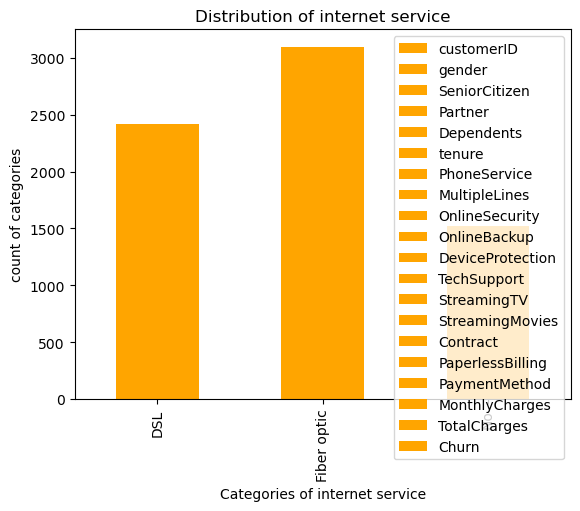

In [43]:
plt.figure(figsize=(5,5))
churn.groupby(["InternetService"]).count().plot(kind="bar",color="orange")
plt.xlabel("Categories of internet service")
plt.ylabel("count of categories")
plt.title("Distribution of internet service")
plt.show()

Text(0.5, 1.0, 'Distribution of tenure')

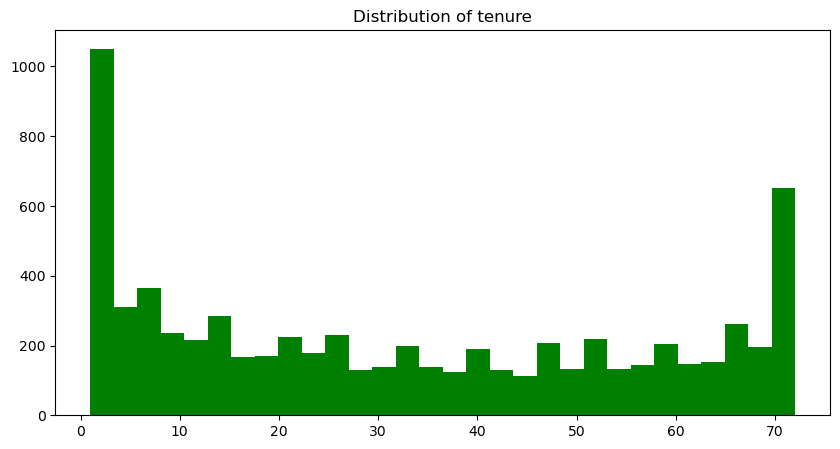

In [50]:
plt.figure(figsize=(10,5))
plt.hist(churn["tenure"],bins=30,color="green")
plt.title("Distribution of tenure")

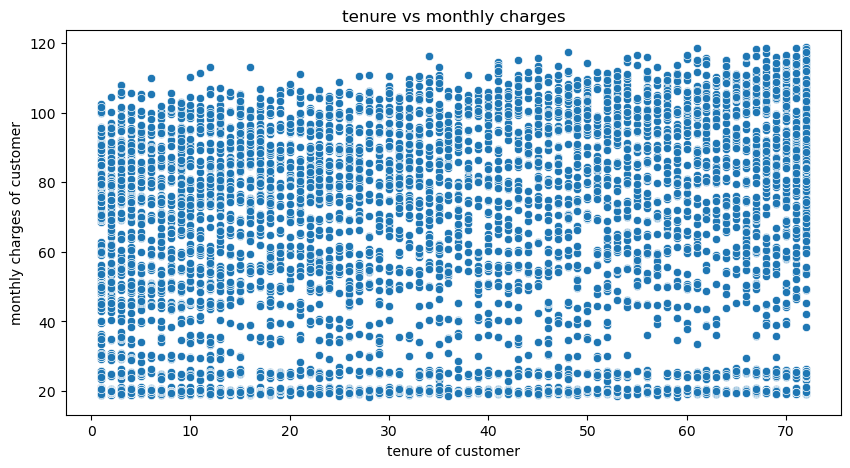

In [60]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="tenure",y="MonthlyCharges",data=churn,palette="brown",legend="full")
plt.xlabel("tenure of customer")
plt.ylabel("monthly charges of customer")
plt.title("tenure vs monthly charges")
plt.show()

<AxesSubplot:xlabel='Contract', ylabel='tenure'>

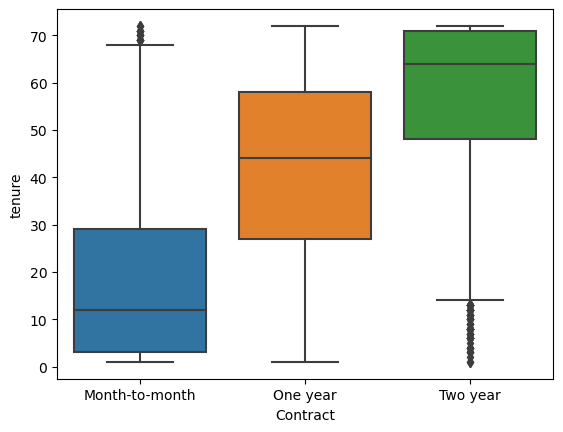

In [63]:
sns.boxplot(x="Contract",y="tenure",data=churn)

# ---------Q2 ends

As customerid is nowhere helping in the prediction and also its values are not appropriate to fit in the model we will be dropping the customerID column

In [64]:
churn.drop("customerID",inplace=True,axis=1)

In [65]:
churn.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [66]:
churn["PaymentMethod"].value_counts()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

In [67]:
churn.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7032.000000  7032.000000     7032.000000   7032.000000
mean        0.162400    32.421786       64.798208   2283.300441
std         0.368844    24.545260       30.085974   2266.771362
min         0.000000     1.000000       18.250000     18.800000
25%         0.000000     9.000000       35.587500    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.862500   3794.737500
max         1.000000    72.000000      118.750000   8684.800000

label encoding.

encoding all the labels as numerical categories as because the kinds of string data cannot be used to fit as these are incompatible type to fit the classifiaction model.

this can be performed through lable_encoder() or using map() function.

In [68]:
churn["Partner"]=churn["Partner"].map({"Yes":1,"No":0})
churn["Dependents"]=churn["Dependents"].map({"Yes":1,"No":0})
churn["MultipleLines"]=churn["MultipleLines"].map({"No phone service":0,"No":1,"Yes":2})
churn["InternetService"]=churn["InternetService"].map({"DSL":0,"Fiber optic":1,"No":2})
churn["OnlineSecurity"]=churn["OnlineSecurity"].map({"Yes":1,"No":0,"No internet service":2})
churn["OnlineBackup"]=churn["OnlineBackup"].map({"Yes":1,"No":0,"No internet service":2})
churn["DeviceProtection"]=churn["DeviceProtection"].map({"Yes":1,"No":0,"No internet service":2})
churn["TechSupport"]=churn["TechSupport"].map({"Yes":1,"No":0,"No internet service":2})
churn["StreamingTV"]=churn["StreamingTV"].map({"Yes":1,"No":0,"No internet service":2})
churn["StreamingMovies"]=churn["StreamingMovies"].map({"Yes":1,"No":0,"No internet service":2})
churn["Contract"]=churn["Contract"].map({"Month-to-month":0,"One year":1,"Two year":2})
churn["PaperlessBilling"]=churn["PaperlessBilling"].map({"Yes":1,"No":0})
churn["PaymentMethod"]=churn["PaymentMethod"].map({"Electronic check":1,"Mailed check":0,"Bank transfer (automatic)":2,
                                                   "Credit card (automatic)":3})

In [69]:
churn

gender  SeniorCitizen  Partner  Dependents  tenure PhoneService  \
0     Female              0        1           0       1           No   
1       Male              0        0           0      34          Yes   
2       Male              0        0           0       2          Yes   
3       Male              0        0           0      45           No   
4     Female              0        0           0       2          Yes   
...      ...            ...      ...         ...     ...          ...   
7038    Male              0        1           1      24          Yes   
7039  Female              0        1           1      72          Yes   
7040  Female              0        1           1      11           No   
7041    Male              1        1           0       4          Yes   
7042    Male              0        0           0      66          Yes   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 0                0               0             1   
1                 1                0               1             0   
2                 1                0               1             1   
3                 0                0               1             0   
4                 1                1               0             0   
...             ...              ...             ...           ...   
7038              2                0               1             0   
7039              2                1               0             1   
7040              0                0               1             0   
7041              2                1               0             0   
7042              1                1               1             0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                    0            0            0                0         0   
1                    1            0            0                0         1   
2                    0            0            0                0         0   
3                    1            1            0                0         1   
4                    0            0            0                0         0   
...                ...          ...          ...              ...       ...   
7038                 1            1            1                1         1   
7039                 1            0            1                1         1   
7040                 0            0            0                0         0   
7041                 0            0            0                0         0   
7042                 1            1            1                1         2   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges Churn  
0                    1              1           29.85         29.85    No  
1                    0              0           56.95       1889.50    No  
2                    1              0           53.85        108.15   Yes  
3                    0              2           42.30       1840.75    No  
4                    1              1           70.70        151.65   Yes  
...                ...            ...             ...           ...   ...  
7038                 1              0           84.80       1990.50    No  
7039                 1              3          103.20       7362.90    No  
7040                 1              1           29.60        346.45    No  
7041                 1              0           74.40        306.60   Yes  
7042                 1              2          105.65       6844.50    No  

[7032 rows x 20 columns]

In [70]:
churn.dtypes

gender               object
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService         object
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

<AxesSubplot:>

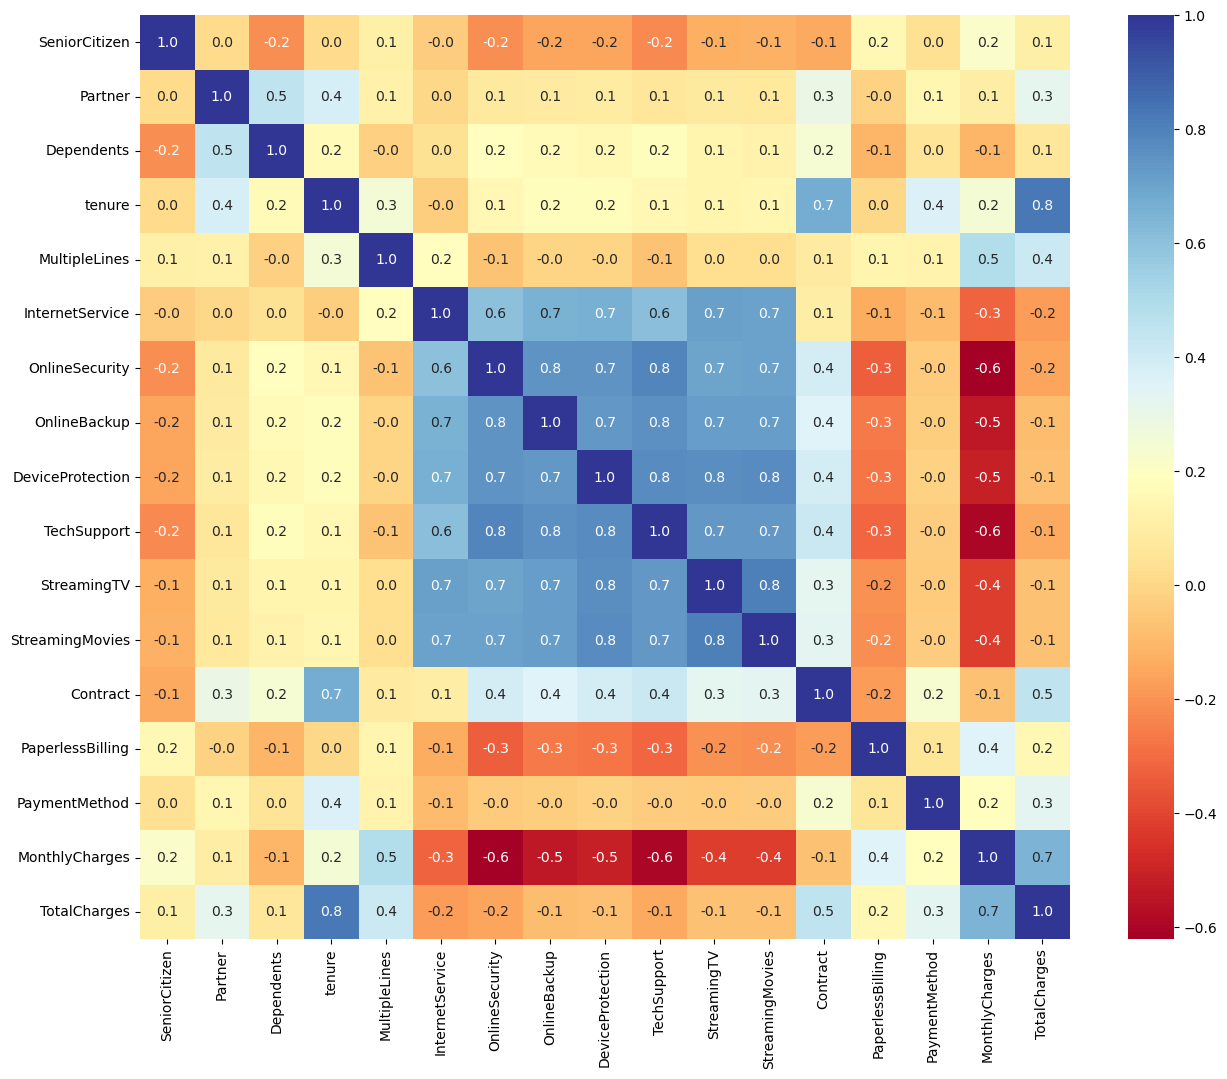

In [71]:
plt.figure(figsize=(15,12))
sns.heatmap(churn.corr(),cmap="RdYlBu",annot=True,fmt=".1f")

model building finally we will map the churn with 1 and 0 instead of yes and no so that all the features and label will have uniform datatype

In [72]:
churn["Churn"]=churn["Churn"].map({"Yes":1,"No":0})

as our main prediction is to check the churning out customers ,so we consider churn as dependent data and all other features as independent

In [73]:
churn.drop(["PhoneService","gender"],axis=1,inplace=True)

# Q3 Linear Regression

In [84]:
x=churn[["tenure"]]

In [85]:
y=churn["MonthlyCharges"]

In [86]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [87]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [88]:
lr.fit(x_train,y_train)

LinearRegression()

In [89]:
lr.score(x_test,y_test)

0.06893699882026205

In [90]:
pred=lr.predict(x_test)

In [99]:
error=np.sqrt(np.mean(pred-y_test)**2)

In [100]:
error

0.7273767981574485

# Q4 Logistic Regression

In [103]:
x=churn[["MonthlyCharges"]]
y=churn["Churn"]

In [105]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35)

In [108]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [109]:
lr.fit(x_train,y_train)

LogisticRegression()

In [110]:
lr.score(x_test,y_test)

0.735174654752234

In [111]:
pred=lr.predict(x_test)

In [112]:
confusion_matrix(y_test,pred)

array([[1810,    0],
       [ 652,    0]], dtype=int64)

In [121]:
accuracy=[(1810/(1810+652))*100]

In [122]:
accuracy

[73.5174654752234]

In [124]:
x=churn[["tenure","MonthlyCharges"]]

In [126]:
y=churn["Churn"]

In [128]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [129]:
lr.fit(x_train,y_train)

LogisticRegression()

In [130]:
lr.score(x_test,y_test)

0.7782515991471215

In [131]:
y_pred=lr.predict(x_test)

In [132]:
confusion_matrix(y_test,y_pred)

array([[940,  98],
       [214, 155]], dtype=int64)

In [133]:
accuracy=((940+155)/(940+98+214+155))*100

In [134]:
accuracy

77.82515991471215

# Q5 Decision Tree

In [135]:
from sklearn.tree import DecisionTreeClassifier

In [136]:
x=churn[["tenure"]]
y=churn["Churn"]

In [137]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [139]:
dr=DecisionTreeClassifier()

In [140]:
dr.fit(x_train,y_train)

DecisionTreeClassifier()

In [141]:
dr.score(x_test,y_test)

0.757640369580668

In [142]:
pred=dr.predict(x_test)

In [144]:
confusion_matrix(y_test,pred)

array([[1000,   47],
       [ 294,   66]], dtype=int64)

In [145]:
accuracy=((1000+66)/(1000+66+294+47))*100

In [146]:
accuracy

75.76403695806681

# Q6 Random forest

In [147]:
from sklearn.ensemble import RandomForestClassifier

In [148]:
x=churn[["tenure","MonthlyCharges"]]
y=churn["Churn"]

In [150]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [151]:
rf=RandomForestClassifier(random_state=42)

In [152]:
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [153]:
rf.score(x_test,y_test)

0.7502369668246446

In [154]:
pred=rf.predict(x_test)

In [156]:
confusion_matrix(y_test,pred)

array([[1332,  231],
       [ 296,  251]], dtype=int64)

In [157]:
accuracy=((1332+251)/(1332+231+296+251))*100

In [158]:
accuracy

75.02369668246446